<a href="https://colab.research.google.com/github/szrobi96/image_recognition/blob/main/Train_YOLO_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train YOLO Models in Google Colab
**Original Author:** Evan Juras, [EJ Technology Consultants](https://ejtech.io)

**Adapted by:** Róbert Szabó, [email](mailto:szabo.robert96@hotmail.com)

**Last updated:** July 08, 2025

**Original GitHub:** [Train and Deploy YOLO Models (Candies)](https://github.com/EdjeElectronics/Train-and-Deploy-YOLO-Models)

**Adapted GitHub:** [Train and Deploy YOLO Models (Pill or Capsule)](https://github.com/szrobi96/image_recognition.git)

# Introduction

This notebook uses [Ultralytics](https://docs.ultralytics.com/) to train YOLO11, YOLOv8, or YOLOv5 object detection models with a custom dataset. At the end of this Colab, you'll have a custom YOLO model that you can run on your PC, phone, or edge device like the Raspberry Pi.

Original YouTube video that walks through this guide step by step.

<p align=center>
<a href="https://youtu.be/r0RspiLG260" target="_blank"><img src="https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/doc/Train_YOLO_Thumbnail2.png" height="240"><br>
<i>Click here to go to the video!</i></a>
</p>

### Working in Colab
Colab provides a virtual machine in your browser complete with a Linux OS, filesystem, Python environment, and best of all, a free GPU. We'll install PyTorch and Ultralytics in this environment and use it to train our model. Simply click the Play button on sections of code in this notebook to execute them on the virtual machine.

### Navigation
To navigate this notebook, use the table of contents in the left sidebar to jump from section to section.

### Dataset
This notebook uses a custom dataset of images of pills and capsules. The dataset is available on Roboflow https://universe.roboflow.com/seblful/pills-detection-s9ywn and can be directly downloaded in the desired format. The dataset is split into training and validation sets, with proper annotations.

# Local Setup

The easiest way to run python code on a PC is using Anaconda (or Miniconda). Anaconda sets up a virtual Python environment and allows you to easily install Python and all necessery tools.

**1. Download and Install Anaconda**

Go to the Anaconda download page at https://www.anaconda.com/download/success#:~:text=Miniconda%20Installers, and then download the package for your OS. When it's finished downloading, run the installer and click through the installation steps. You can use the default options for installation.

**2. Set up virtual environment**

Once it's installed, run Anaconda Prompt from the Start Bar. (If you're on macOS or Linux, just open a command terminal).

Issue the following commands to create a new Python environment and activate it:

```shell
conda create --name yolo-env1 python=3.12 -y
conda activate yolo-env1
```

Install Ultralytics (which also installs import libraries like OpenCV-Python, Numpy, and PyTorch) by issuing the following command:

```shell
pip install ultralytics
```

**ONLY** If you have an NVIDIA GPU, you can install the GPU-enabled version of PyTorch by issuing the following command:

```shell
pip install --upgrade torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124
```

**3. Download and run yolo_detect.py**

Create a new folder called `my_model` in your home directory (or wherever you want to store your model files). You can do this by running:

```shell
mkdir my_model
```
Then, change into the `my_model` directory:

```shell
cd my_model
```

Download the `yolo_detect.py` script into the `my_model` folder using:

```shell
curl -o yolo_detect.py https://raw.githubusercontent.com/szrobi96/image_recognition/refs/heads/main/yolo_detect.py
```

Ultralytics provides already trained models that you can use for object detection. For example, you can use `yolo11n.pt`, which is a small, fast model that can detect 80 different classes of objects on a Webcam by issuing the following command:
```
python yolo_detect.py --model yolo11n.pt --source usb0 --resolution 1280x720
```

A window will appear showing a live feed from your webcam with boxes drawn around detected objects in each frame.

An overview of stock models can be found in the [Ultralytics Models documentation](https://docs.ultralytics.com/models/).

You can also run the model on an video file, image, or folder of images. To see a full list of arguments for `yolo_detect.py`, issue `python yolo_detect.py --help` or see the [README file](https://github.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/blob/main/README.md).

# Train YOLO Models in Google Colab with Custom Dataset

**Verify NVIDIA GPU Availability**

Make sure you're using a GPU-equipped machine by going to "Runtime" -> "Change runtime type" in the top menu bar, and then selecting one of the GPU options in the Hardware accelerator section. Click Play on the following code block to verify that the NVIDIA GPU is present and ready for training.

In [4]:
!nvidia-smi

Wed Jul  9 22:10:27 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# 1.&nbsp;Gather and Label Training Images

Before we start training, we need to gather and label images that will be used for training the object detection model. A good starting point for a proof-of-concept model is 200 images. The training images should have random objects in the image along with the desired objects, and should have a variety of backgrounds and lighting conditions.

There are a couple options for gathering images:


*   Build a custom dataset by taking your own pictures of the objects and labeling them (this typically results in the best performance)
*   Find a pre-made dataset from sources like [Roboflow Universe](), [Kaggle](), or [Google Images V7]() <-- ***This is our preferred option for this notebook, as it allows you to quickly get started with a pre-made dataset.***

If you want to build your own dataset, there are several tools available for labeling images. One good option is [Label Studio](https://labelstud.io/?utm_source=youtube&utm_medium=video&utm_campaign=edjeelectronics), a free and open-source labeling tool that has a simple workflow while providing capabilities for more advanced features. My YouTube video that walks through this notebook (link to be added soon) shows how to label images with Label Studio.

<p align=center>
<img src="https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/doc/label-studio-example.PNG" height="380"><br>
<i>Example of a candy image labeled with Label Studio.</i>
</p>

* If you used Label Studio to label and export the images, they'll be exported in a `project.zip` file that contains the following:

- An `images` folder containing the images
- A `labels` folder containing the labels in YOLO annotation format
- A `classes.txt` labelmap file that contains all the classes
- A `notes.json` file that contains info specific to Label Studio (this file can be ignored)

## Download the Pill & Capsule Dataset from Roboflow

To train your model, you'll need a dataset of labeled images. The pill and capsule dataset is available for free on Roboflow Universe. Follow these steps to download it:

1. Go to the [Pills Detection Dataset on Roboflow Universe](https://universe.roboflow.com/seblful/pills-detection-s9ywn).
2. Click the **Dataset** button in the side panel.
3. Click **Download Dataset** and then again **Download Dataset** in the popup. Click **Continue**.
4. Under **Image and Annotation Format**, select your desired format (for this notebook, choose **YOLOv11**), check **Download zip to computer**, and click **Continue**.

A `.zip` file containing your dataset will be downloaded to your computer.

> **Tip:** If you have trouble downloading with Mozilla Firefox, try using Google Chrome or Microsoft Edge instead.

Once your dataset is downloaded, you're ready to move on to the next step!

# 2.&nbsp;Upload Image Dataset and Prepare Training Data

Next, we'll upload our dataset and prepare it for training with YOLO.

## 2.1 Upload images

First, we need to upload the dataset to Colab. Here are a few options for moving the `.zip` folder into this Colab instance.

**Upload through Google Colab**

Upload the `*.zip` file to the Google Colab instance by clicking the "Files" icon on the left hand side of the browser, and then the "Upload to session storage" icon. Select the zip folder to upload it.

<p>
<br>
<img src="https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/doc/upload-colab-files.png" height="240">
</p>


## 2.2 Split images into train and validation folders

At this point, whether you used Option 1, or 2, you should be able to click the folder icon on the left and see your `data.zip` file in the list of files. Next, we'll unzip `data.zip` and create some folders to hold the images. Run the following code block to unzip the data.

In [5]:
# Unzip images to a custom data folder
!unzip -q /content/data.zip -d /content/data

Ultralytics requires a particular folder structure to store training data for models. The root folder is named “data”. Inside, there are two main folders:

*   **Train**: These are the actual images used to train the model. In one epoch of training, every image in the train set is passed into the neural network. The training algorithm adjusts the network weights to fit the data in the images.

*   **Validation**: These images are used to check the model's performance at the end of each training epoch.

... and a third, optional folder:

*   **Test**: These images are used to test the model's performance after training is complete. This set is not used during training, but is used to evaluate the model's accuracy on unseen data.

In each of these folders is a “images” folder and a “labels” folder, which hold the image files and annotation files respectively. The annotation files are in the YOLO format, which is a text file with the same name as the image file, but with a `.txt` extension. Each line in the text file contains the class ID and bounding box coordinates for an object in the image.

The data is already in the correct format, and split into train and validation sets, so we can simply continue with the next step.

# 3.&nbsp;Install Requirements (Ultralytics)

Next, we'll install the Ultralytics library in this Google Colab instance. This Python library will be used to train the YOLO model.

In [6]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 111.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

# 4.&nbsp;Configure Training


There's one last step before we can run training: we need to create the Ultralytics training configuration YAML file. This file specifies the location of your train and validation data, and it also defines the model's classes. Since we downloaded the dataset from Roboflow, it should already be present. If you assembled the dataset another way, you may have to manually create the `data.yaml` configuration file.

In [8]:
!cat /content/data/data.yaml

train: ../data/train/images
val: ../data/valid/images
test: ../data/test/images

nc: 2
names: ['capsules', 'tablets']

roboflow:
  workspace: test-mkoze
  project: pills-detection-s9ywn-sx84u
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/test-mkoze/pills-detection-s9ywn-sx84u/dataset/1

Adjust any information (for example the Path), if it not correct

# 5.&nbsp;Train Model

## 5.1 Training Parameters
Now that the data is organized and the config file is created, we're ready to start training! First, there are a few important parameters to decide on. Visit my article on [Training YOLO Models Locally](https://www.ejtech.io/learn/train-yolo-models) to learn more about these parameters and how to choose them.

**Model architecture & size (`model`):**

There are several YOLO11 models sizes available to train, including `yolo11n.pt`, `yolo11s.pt`, `yolo11m.pt`, `yolo11l.pt`, and `yolo11xl.pt`. Larger models run slower but have higher accuracy, while smaller models run faster but have lower accuracy. I made a brief YouTube video that compares performance of different YOLO models on a Raspberry Pi 5 and a laptop with a RTX 4050 GPU, [check it out here to get a sense of their speed accuracy](https://youtu.be/_WKS4E9SmkA). If you aren't sure which model size to use, `yolo11s.pt` is a good starting point.

You can also train YOLOv8 or YOLOv5 models by substituting `yolo11` for `yolov8` or `yolov5`.


**Number of epochs (`epochs`)**

In machine learning, one “epoch” is one single pass through the full training dataset. Setting the number of epochs dictates how long the model will train for. The best amount of epochs to use depends on the size of the dataset and the model architecture. If your dataset has less than 200 images, a good starting point is 60 epochs. If your dataset has more than 200 images, a good starting point is 40 epochs.


**Resolution (`imgsz`)**

Resolution has a large impact on the speed and accuracy of the model: a lower resolution model will have higher speed but less accuracy. YOLO models are typically trained and inferenced at a 640x640 resolution. However, if you want your model to run faster or know you will be working with low-resolution images, try using a lower resolution like 480x480.


## 5.2 Run Training!

Run the following code block to begin training. If you want to use a different model, number of epochs, or resolution, change `model`, `epochs`, or `imgsz`.

In [9]:
!yolo detect train data=/content/data/data.yaml model=yolo11l.pt epochs=20 imgsz=512

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 49.0M/49.0M [00:00<00:00, 126MB/s]
Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=Fal

The training algorithm will parse the images in the training and validation directories and then start training the model. At the end of each training epoch, the program runs the model on the validation dataset and reports the resulting mAP, precision, and recall. As training continues, the mAP should generally increase with each epoch. Training will end once it goes through the number of epochs specified by `epochs`.

> **NOTE:** Make sure to allow training to run to completion, because an optimizer runs at the end of training that strips out unneeded layers from the model.

The best trained model weights will be saved in `content/runs/detect/train/weights/best.pt`. Additional information about training is saved in the `content/runs/detect/train` folder, including a `results.png` file that shows how loss, precision, recall, and mAP progressed over each epoch.

# 6.&nbsp;Train Model

The model has been trained; now it's time to test it! The commands below run the model on the images in the validation folder and then display the results for the first 10 images. This is a good way to confirm your model is working as expected. Click Play on the blocks below to see how your model performs.

In [10]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=data/test/images save=True

Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 190 layers, 25,280,854 parameters, 0 gradients, 86.6 GFLOPs

image 1/78 /content/data/test/images/1000_F_420127490_zYfufzLT1jVxPzLVJzIh46ZI6FSeML3B_jpg.rf.e7074fa8c2643648ac39b806a399557e.jpg: 352x512 17 tabletss, 48.4ms
image 2/78 /content/data/test/images/1003948616_jpg.rf.0ac61ea8255522f565f8a4f06ca6eb1c.jpg: 512x512 18 capsuless, 3 tabletss, 32.9ms
image 3/78 /content/data/test/images/1068691880_jpg.rf.a7ca559470c0a1b1c551d460077f1b45.jpg: 512x512 8 tabletss, 32.1ms
image 4/78 /content/data/test/images/107091458_jpg.rf.b61d3f764990bb7619f1c4c57b2720de.jpg: 256x512 33 capsuless, 103 tabletss, 48.5ms
image 5/78 /content/data/test/images/1113263349_jpg.rf.884c822b1d1921a8ce3e7f8d8770432e.jpg: 512x288 3 tabletss, 50.9ms
image 6/78 /content/data/test/images/112161335_jpg.rf.46c7e9354e6603731a8cb8a8be508034.jpg: 512x288 3 capsuless, 18 tabletss, 22.0ms
image 7/78 /content/data/test

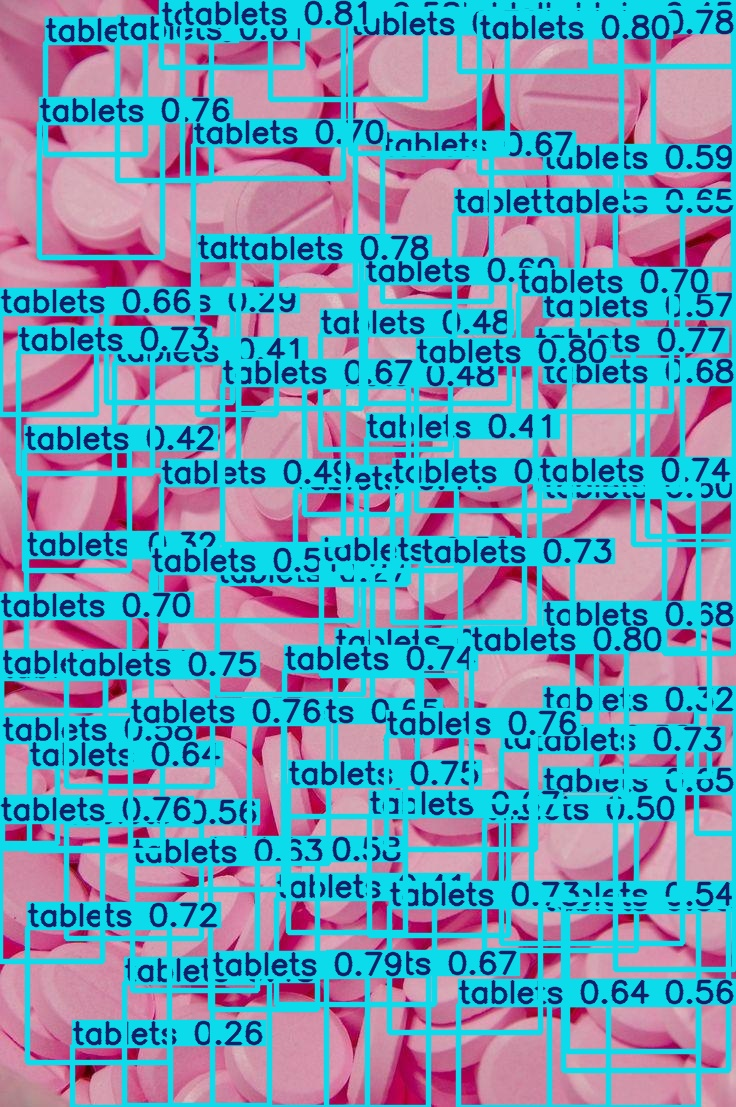

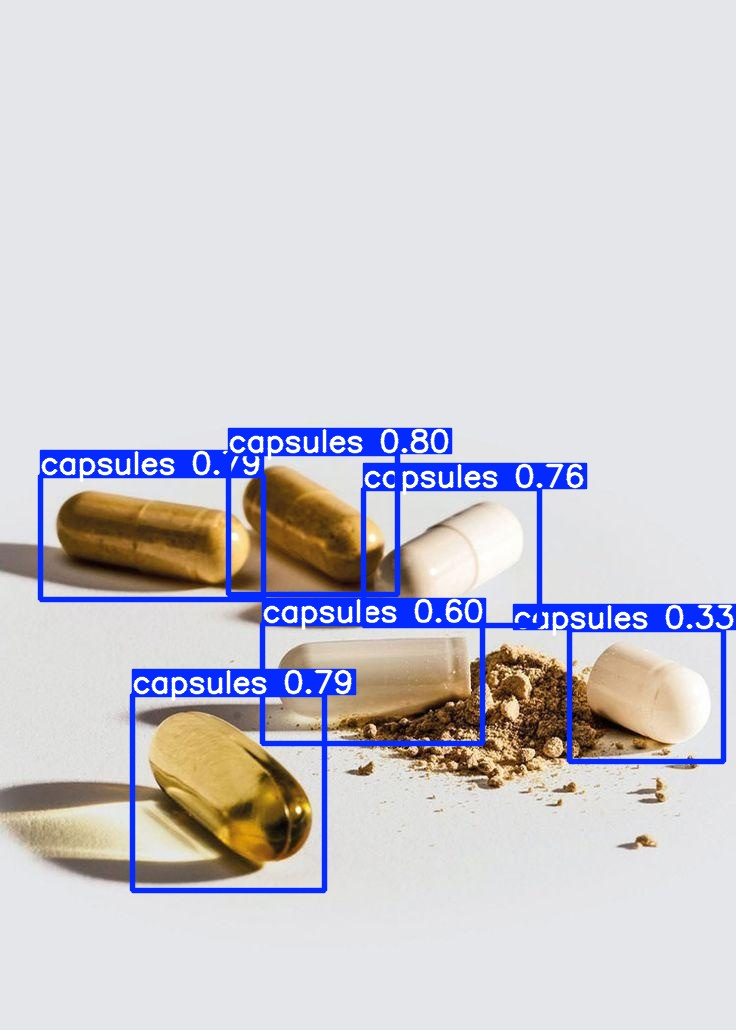

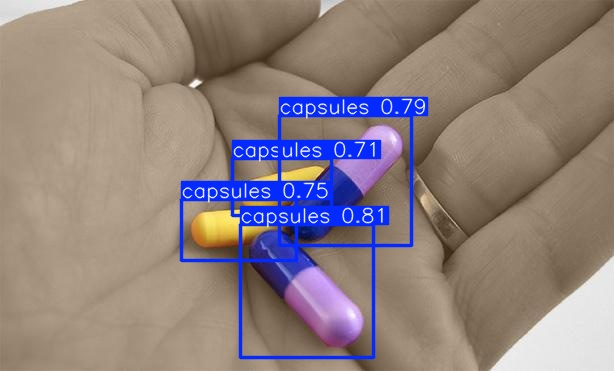

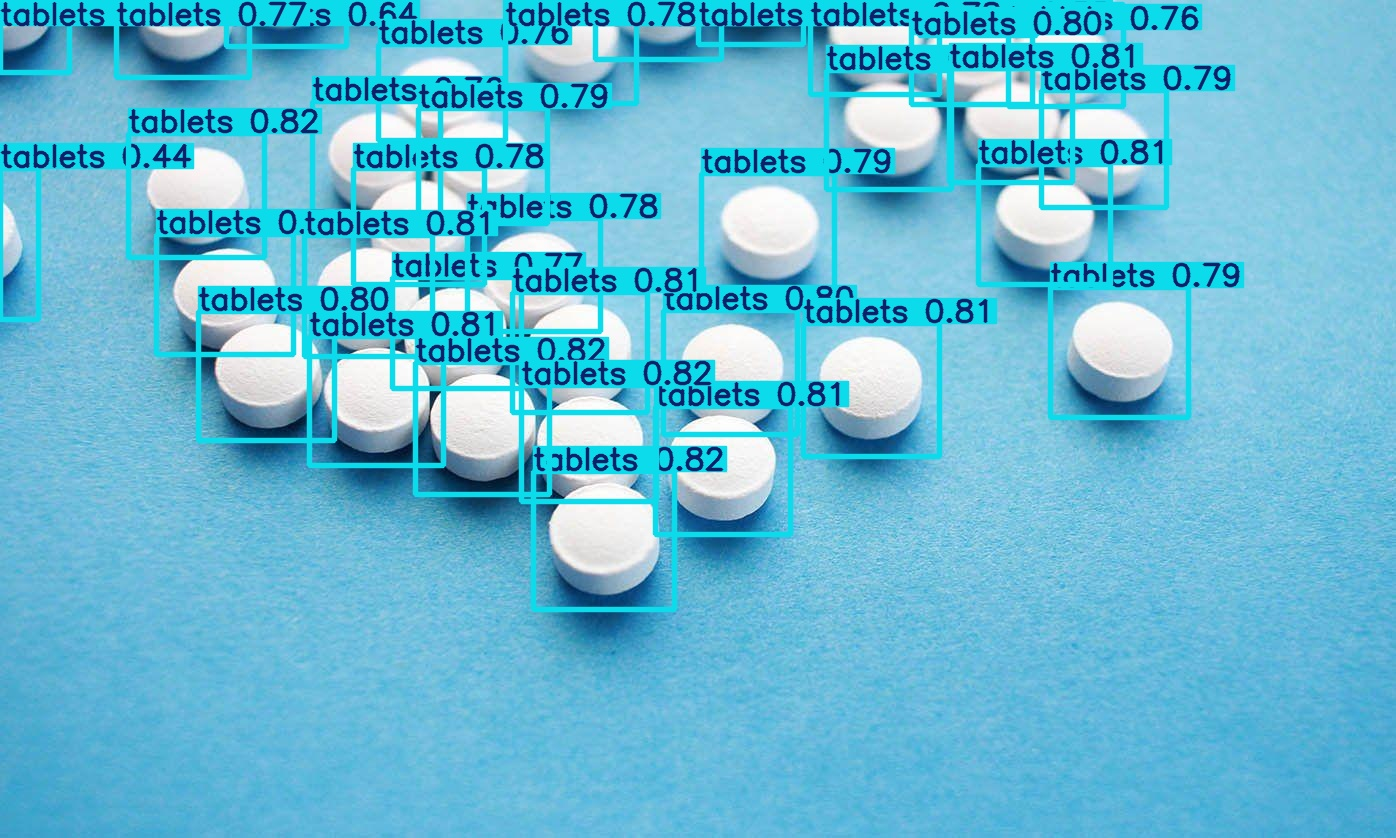

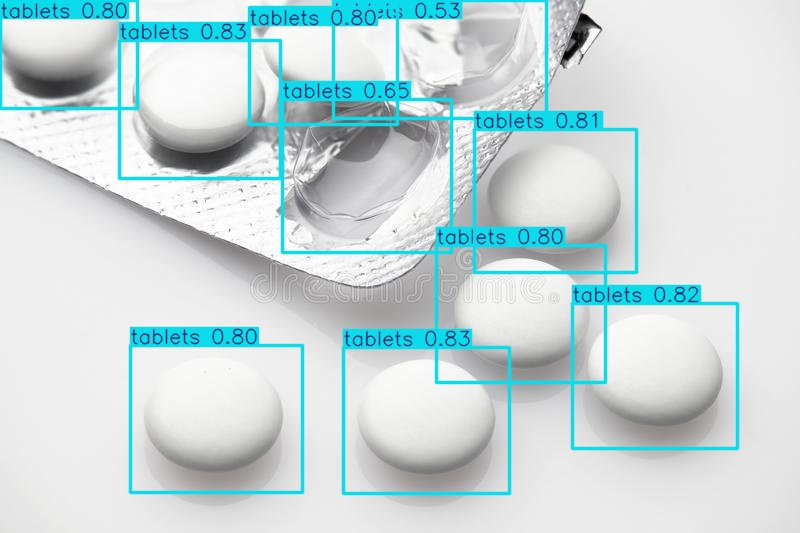

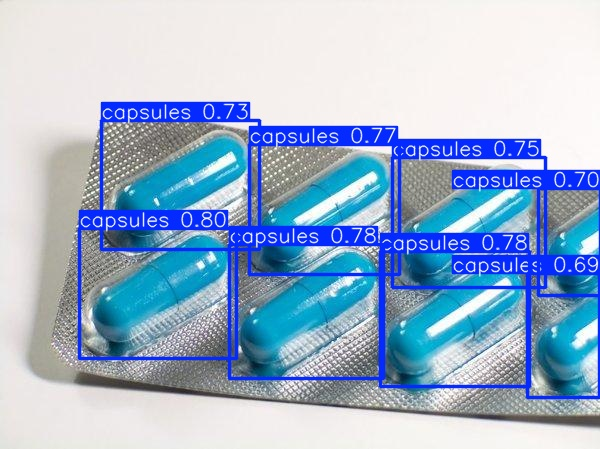

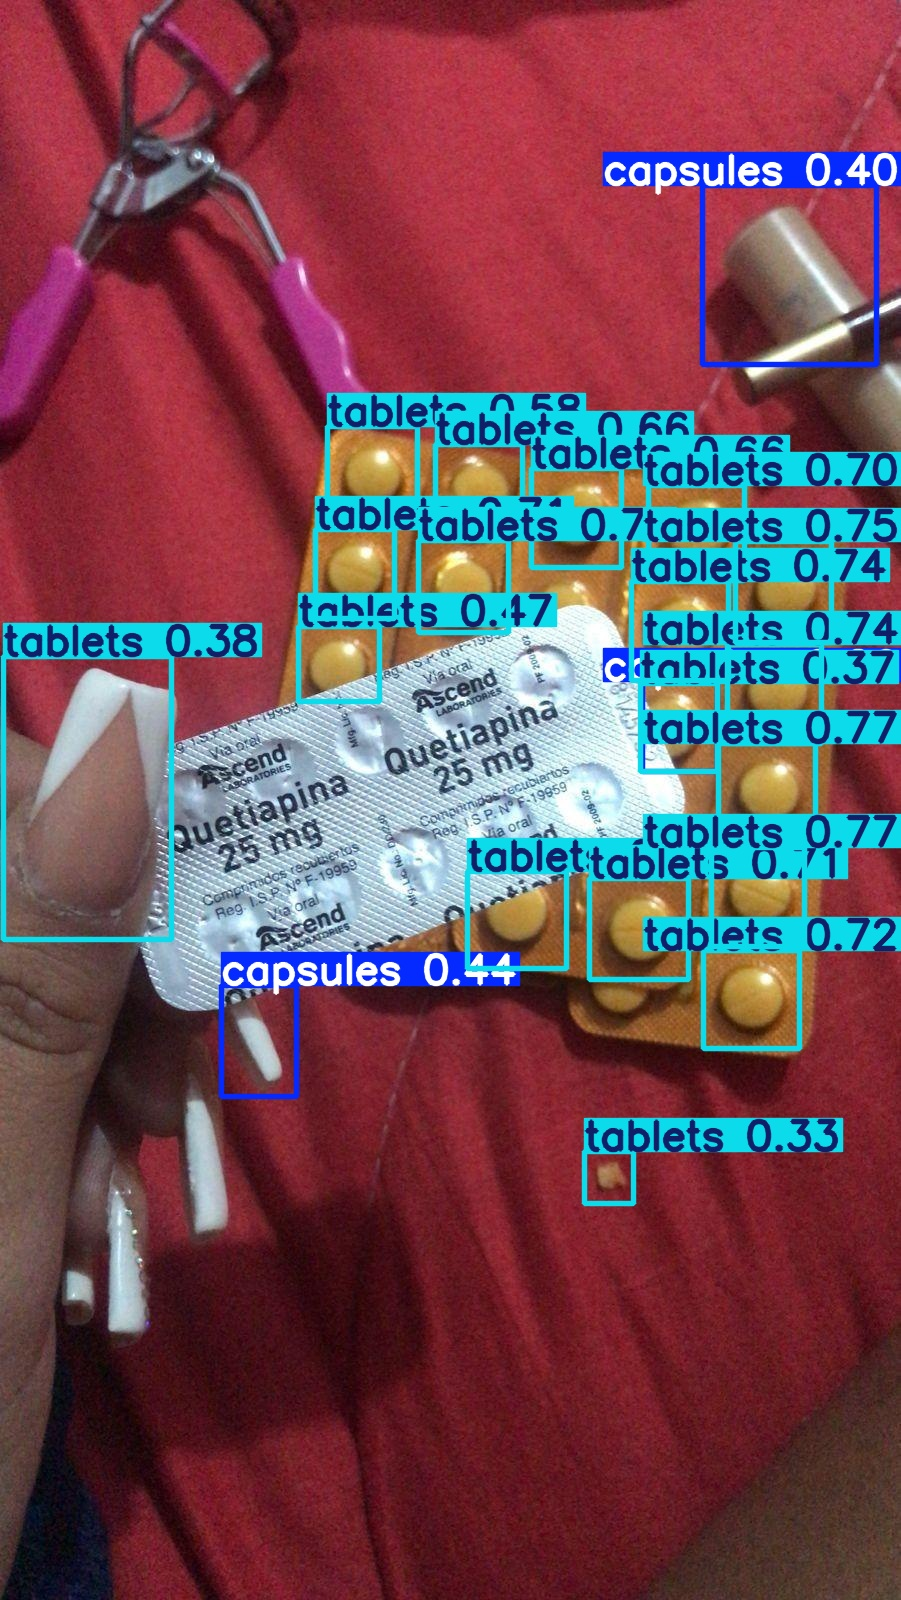

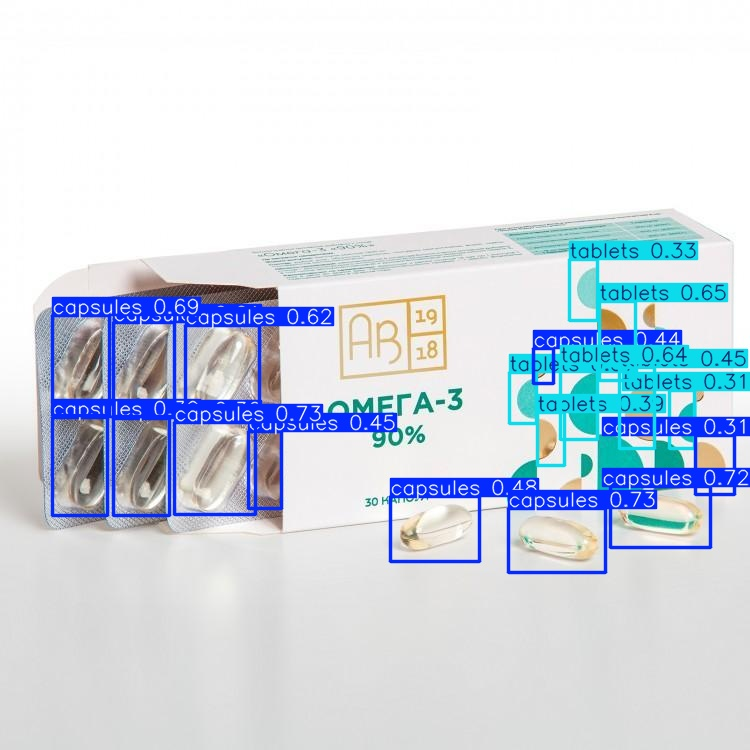

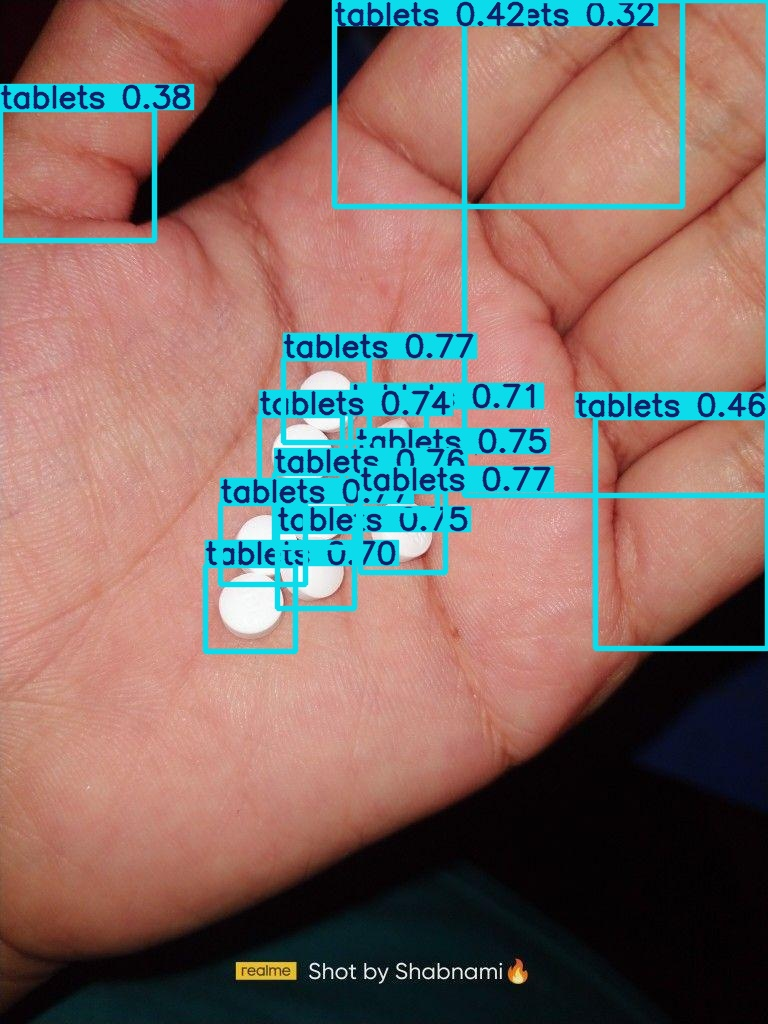

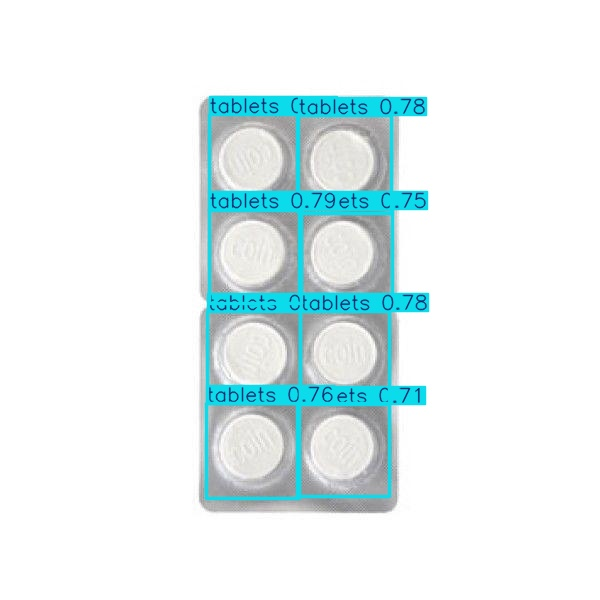

In [11]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')


The model should draw a box around each object of interest in each image. If it isn't doing a good job of detecting objects, here are a few tips:

1. Double-check your dataset to make sure there are no labeling errors or conflicting examples.
2. Increase the number of epochs used for training.
3. Use a larger model size (e.g. `yolo11l.pt`).
4. Add more images to the training dataset. See my [dataset video](https://www.youtube.com/watch?v=v0ssiOY6cfg) for tips on how to capture good training images and improve accuracy.

You can also run the model on video files or other images images by uploading them to this notebook and using the above `!yolo detect predict` command, where `source` points to the location of the video file, image, or folder of images. The results will be saved in `runs/detect/predict`.

Drawing boxes on images is great, but it isn't very useful in itself. It's also not very helpful to just run this models inside a Colab notebook: it's easier if we can just run it on a local computer. Continue to the next section to see how to download your newly trained model and run it on a local device.

# 7.&nbsp;Deploy Model

Now that your custom model has been trained, it's ready to be downloaded and deployed in an application! YOLO models can run on a wide variety of hardware, including PCs, embedded systems, and phones. Ultralytics makes it easy to convert the YOLO models to various formats (`tflite`, `onnx`, etc.) and deploy them in a variety of environments.

This section shows how to download the model and provides links to instructions for deploying it on your PC and edge devices like the Raspberry Pi.

## 7.1 Download YOLO Model

First, zip and download the trained model by running the code blocks below.

The code creates a folder named `my_model`, moves the model weights into it, and renames them from `best.pt` to `my_model.pt`. It also adds the training results in case you want to reference them later. It then zips the folder as `my_model.zip`.

In [12]:
# Create "my_model" folder to store model weights and train results
!mkdir /content/my_model
!cp /content/runs/detect/train/weights/best.pt /content/my_model/my_model.pt
!cp -r /content/runs/detect/train /content/my_model

# Zip into "my_model.zip"
%cd my_model
!zip /content/my_model.zip my_model.pt
!zip -r /content/my_model.zip train
%cd /content

/content/my_model
  adding: my_model.pt (deflated 8%)
  adding: train/ (stored 0%)
  adding: train/confusion_matrix.png (deflated 29%)
  adding: train/weights/ (stored 0%)
  adding: train/weights/last.pt (deflated 8%)
  adding: train/weights/best.pt (deflated 8%)
  adding: train/results.png (deflated 7%)
  adding: train/args.yaml (deflated 53%)
  adding: train/val_batch1_pred.jpg (deflated 7%)
  adding: train/BoxPR_curve.png (deflated 15%)
  adding: train/train_batch2.jpg (deflated 7%)
  adding: train/val_batch2_labels.jpg (deflated 8%)
  adding: train/train_batch312.jpg (deflated 8%)
  adding: train/confusion_matrix_normalized.png (deflated 29%)
  adding: train/labels_correlogram.jpg (deflated 33%)
  adding: train/labels.jpg (deflated 28%)
  adding: train/train_batch310.jpg (deflated 8%)
  adding: train/val_batch1_labels.jpg (deflated 8%)
  adding: train/val_batch0_labels.jpg (deflated 7%)
  adding: train/BoxR_curve.png (deflated 12%)
  adding: train/val_batch2_pred.jpg (deflated 8%)


In [13]:
# This takes forever for some reason, you can also just download the model from the sidebar
from google.colab import files

files.download('/content/my_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 7.2 Deploy YOLO Model on Local Devices

Next, we'll take our downloaded model and run it on a local device. This section provides instructions showing how to deploy YOLO models on various devices.

I wrote a basic Python script, `yolo_detect.py`, that shows how to load a model, run inference on an image source, parse the inference results, and display boxes around each detected class in the image. The [script](https://github.com/szrobi96/image_recognition/blob/main/yolo_detect.py) gives an example of how to work with Ultralytics YOLO models in Python, and it can be used as a starting point for more advanced applications.

### Deploy on PC (Windows, Linux, or macOS)

We can run the model on a PC using the `yolo_detect.py` script just like we did in the first section of this notebook. Follow these steps to run the model on your PC:

If you closed the Anaconda Prompt terminal, open it again and activate the `yolo-env1` environment by issuing:

```shell
conda activate yolo-env1
```

**1. Extract downloaded model**
Take the `my_model.zip` file you downloaded in Step 7.1 and unzip it to a folder on your PC where you already have the `yolo_detect.py` script. You can use any unzip tool, such as the built-in Windows or macOS unzip tool, or a third-party tool like 7-Zip.

**2. Change directory to the model folder**
In the Anaconda Prompt, change to the directory where you unzipped the model. You can do this by using the `cd` command followed by the path to the folder where you unzipped the model. For example, if you unzipped it to a folder called `my_model` in your home directory, you would use:

```shell
cd %USERPROFILE%\my_model
```

**3. Run the model on a webcam or video file**
Now that you're in the model folder, you can run the `yolo_detect.py` script to run inference on a webcam or video file. The script takes several arguments, including the model file, source (webcam or video file), and resolution.

To run the model on your webcam, use the following command:

```shell
python yolo_detect.py --model my_model.pt --source usb0 --resolution 1280x720
```
A window will appear showing a live feed from your webcam with boxes drawn around detected objects in each frame.

If you want to run the model on a video file, replace `usb0` with the path to your video file. For example download following video:

```shell
curl -o videos/test_video.mp4 https://raw.githubusercontent.com/szrobi96/image_recognition/main/objective/test_video.mp4
```

And then run:
```shell
python yolo_detect.py --model my_model.pt --source videos/test_video.mp4 --resolution 1280x720
```

You can also run the model on an video file, image, or folder of images. To see a full list of arguments for `yolo_detect.py`, issue `python yolo_detect.py --help` or see the [README file](https://github.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/blob/main/README.md).


# 8.&nbsp;Conclusion

Congratulations! You've successfully trained and deployed a YOLO object detection model. 😀

Next, you can extend your application beyond just drawing boxes and counting objects. Add functionality like logging the number of objects detected over time or taking a picture when certain objects are detected.

Thanks for working through this notebook, and good luck with your projects!